In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
%matplotlib inline
sns.set_style('darkgrid')

In [3]:
carDf = pd.read_csv("https://raw.githubusercontent.com/suthapalliuday/Car-price-prediction/master/train-data.csv").iloc[:,1:]

In [4]:
carDf.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [5]:
"""
https://raw.githubusercontent.com/suthapalliuday/Car-price-prediction/master/test-data.csv

"""

'\nhttps://raw.githubusercontent.com/suthapalliuday/Car-price-prediction/master/test-data.csv\n\n'

In [6]:
carDf.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [7]:
carDf.shape

(6019, 13)

In [8]:
carDf.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')

In [9]:
carDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


In [10]:
carDf.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [11]:
carDf.drop(['New_Price'],axis=1,inplace=True)

In [12]:
carDf.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [13]:
print(carDf.shape)

(6019, 12)


In [14]:
def splitCompanyNameFromCarName(name):
    return name.split()[0]

In [15]:
carDf['Company'] = carDf['Name'].apply(splitCompanyNameFromCarName)

<AxesSubplot:xlabel='GroupOfCar', ylabel='count'>

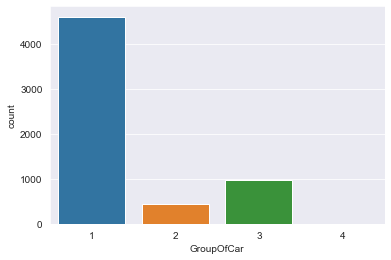

In [16]:
group = carDf.groupby('Company').Price.describe()['50%']
def groupCars(car):
    if group[car]<10:
        return 1
    elif group[car]>=10 and group[car]<20:
        return 2
    elif group[car]>=20 and group[car]<50:
        return 3
    else:
        return 4
carDf['GroupOfCar'] = carDf.Company.apply(groupCars)

sns.countplot(data=carDf,x='GroupOfCar')

In [17]:
group

Company
Ambassador         1.350
Audi              23.500
BMW               21.000
Bentley           59.000
Chevrolet          2.500
Datsun             3.100
Fiat               2.600
Force              8.000
Ford               5.345
Honda              4.950
Hyundai            4.600
ISUZU             12.045
Isuzu             20.000
Jaguar            31.900
Jeep              18.500
Lamborghini      120.000
Land              35.000
Mahindra           7.570
Maruti             4.150
Mercedes-Benz     24.000
Mini              24.285
Mitsubishi         9.950
Nissan             4.300
Porsche           47.020
Renault            5.490
Skoda              6.000
Smart              3.000
Tata               2.900
Toyota            10.750
Volkswagen         4.890
Volvo             18.250
Name: 50%, dtype: float64

In [18]:
def groupCars(car):
    if group[car]<10:
        return 1
    elif group[car]>=10 and group[car]<20:
        return 2
    elif group[car]>=20 and group[car]<50:
        return 3
    else:
        return 4

In [19]:
carDf['GroupOfCar'] = carDf.Company.apply(groupCars)

In [20]:
carDf.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company,GroupOfCar
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,Maruti,1
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,Hyundai,1
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,Honda,1
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,Maruti,1
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,Audi,3


In [21]:
carDf['Mileage'] = carDf['Mileage'].str.replace(' km/kg', '')
carDf['Mileage'] = carDf['Mileage'].str.replace(' kmpl', '')
carDf['Mileage'] = pd.to_numeric(carDf['Mileage'], errors='coerce')

In [22]:
carDf.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company,GroupOfCar
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998 CC,58.16 bhp,5.0,1.75,Maruti,1
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582 CC,126.2 bhp,5.0,12.50,Hyundai,1
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199 CC,88.7 bhp,5.0,4.50,Honda,1
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248 CC,88.76 bhp,7.0,6.00,Maruti,1
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968 CC,140.8 bhp,5.0,17.74,Audi,3


<AxesSubplot:>

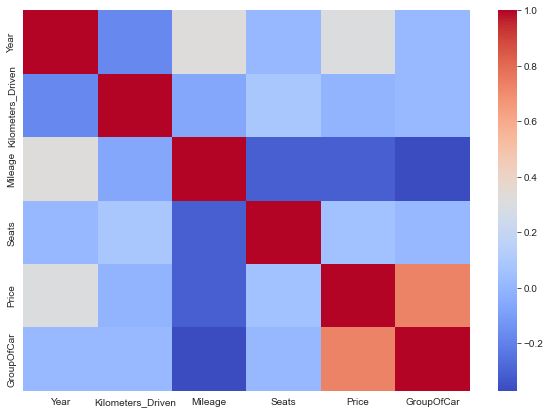

In [23]:
plt.figure(figsize=(10,7))
sns.heatmap(carDf.corr(),cmap='coolwarm')

In [24]:
carDf['Engine'] = carDf['Engine'].str.replace(' CC', '')
carDf['Engine'] = pd.to_numeric(carDf['Engine'], errors='coerce')

In [25]:
carDf.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company,GroupOfCar
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16 bhp,5.0,1.75,Maruti,1
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.2 bhp,5.0,12.50,Hyundai,1
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.7 bhp,5.0,4.50,Honda,1
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76 bhp,7.0,6.00,Maruti,1
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.8 bhp,5.0,17.74,Audi,3


In [26]:
carDf['Power'] = carDf['Power'].str.replace(' bhp', '')
carDf['Power'] = carDf['Power'].str.replace('null', '0.0')
carDf['Power'] = pd.to_numeric(carDf['Power'], errors='coerce')

In [27]:
carDf.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
Company               0
GroupOfCar            0
dtype: int64

In [28]:
carDf['Mileage'].nunique()

430

In [29]:
print("Mean of Mileage =",np.mean(carDf['Mileage']))
carDf['Mileage'].fillna(value=np.mean(carDf['Mileage']),inplace=True)

Mean of Mileage = 18.134960943992073


In [30]:
carDf.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine               36
Power                36
Seats                42
Price                 0
Company               0
GroupOfCar            0
dtype: int64

In [31]:
carDf['Engine'].nunique()

146

In [32]:
print("Mean of Engine =",np.mean(carDf['Engine']))
carDf['Engine'].fillna(value=np.mean(carDf['Engine']),inplace=True)

Mean of Engine = 1621.276449941501


In [33]:
carDf.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine                0
Power                36
Seats                42
Price                 0
Company               0
GroupOfCar            0
dtype: int64

In [34]:
print("Mean of Power =",np.mean(carDf['Power']))
carDf['Power'].fillna(value=np.mean(carDf['Power']),inplace=True)

Mean of Power = 111.22763162293077


In [35]:
carDf.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine                0
Power                 0
Seats                42
Price                 0
Company               0
GroupOfCar            0
dtype: int64

In [36]:
carDf['Seats'].nunique()

9

<AxesSubplot:xlabel='Seats', ylabel='count'>

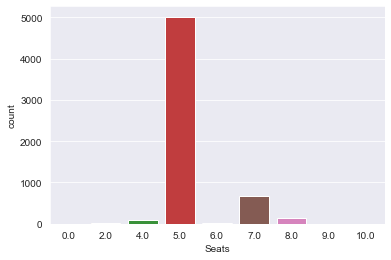

In [37]:
sns.countplot(x="Seats",data=carDf)

In [38]:
print("Mean of Seats = ",np.mean(carDf['Seats']))

Mean of Seats =  5.278735151413753


In [39]:
carDf['Seats'].fillna(value=int(np.mean(carDf['Seats'])),inplace=True)

In [40]:
carDf.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Company              0
GroupOfCar           0
dtype: int64

In [41]:
carDf[carDf['Mileage']==0.0]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company,GroupOfCar
14,Land Rover Freelander 2 TD4 SE,Pune,2012,85000,Diesel,Automatic,Second,0.0,2179.00000,115.000000,5.0,17.50,Land,3
67,Mercedes-Benz C-Class Progressive C 220d,Coimbatore,2019,15369,Diesel,Automatic,First,0.0,1950.00000,194.000000,5.0,35.67,Mercedes-Benz,3
79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,0.0,1086.00000,0.000000,5.0,1.30,Hyundai,1
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.0,1621.27645,111.227632,5.0,2.95,Honda,1
229,Ford Figo Diesel,Bangalore,2015,70436,Diesel,Manual,First,0.0,1498.00000,99.000000,5.0,3.60,Ford,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5647,Toyota Qualis Fleet A3,Mumbai,2001,227000,Diesel,Manual,Fourth & Above,0.0,2446.00000,0.000000,8.0,2.20,Toyota,2
5875,Mercedes-Benz C-Class Progressive C 220d,Ahmedabad,2019,4000,Diesel,Automatic,First,0.0,1950.00000,194.000000,5.0,35.00,Mercedes-Benz,3
5943,Mahindra Jeep MM 540 DP,Chennai,2002,75000,Diesel,Manual,First,0.0,2112.00000,0.000000,6.0,1.70,Mahindra,1
5972,Hyundai Santro Xing GL,Mumbai,2008,65000,Petrol,Manual,Second,0.0,1086.00000,62.000000,5.0,1.39,Hyundai,1


In [42]:
carDf[carDf['Engine']==0.0]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company,GroupOfCar


In [43]:
carDf[carDf['Power']==0.0]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company,GroupOfCar
76,Ford Fiesta 1.4 SXi TDCi,Jaipur,2008,111111,Diesel,Manual,First,17.80,1399.0,0.0,5.0,2.00,Ford,1
79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,0.00,1086.0,0.0,5.0,1.30,Hyundai,1
89,Hyundai Santro Xing XO,Hyderabad,2007,73745,Petrol,Manual,First,17.00,1086.0,0.0,5.0,2.10,Hyundai,1
120,Hyundai Santro Xing XL eRLX Euro III,Mumbai,2005,102000,Petrol,Manual,Second,17.00,1086.0,0.0,5.0,0.85,Hyundai,1
143,Hyundai Santro Xing XO eRLX Euro II,Kochi,2008,80759,Petrol,Manual,Third,17.00,1086.0,0.0,5.0,1.67,Hyundai,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5873,Hyundai Santro Xing XO eRLX Euro II,Pune,2006,47200,Petrol,Manual,Second,17.00,1086.0,0.0,5.0,1.20,Hyundai,1
5893,Maruti Estilo LXI,Chennai,2008,51000,Petrol,Manual,Second,19.50,1061.0,0.0,5.0,1.75,Maruti,1
5925,Skoda Laura Classic 1.8 TSI,Pune,2010,85000,Petrol,Manual,First,17.50,1798.0,0.0,5.0,2.85,Skoda,1
5943,Mahindra Jeep MM 540 DP,Chennai,2002,75000,Diesel,Manual,First,0.00,2112.0,0.0,6.0,1.70,Mahindra,1


In [44]:

carDf[carDf['Seats']==0.0]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company,GroupOfCar
3999,Audi A4 3.2 FSI Tiptronic Quattro,Hyderabad,2012,125000,Petrol,Automatic,First,10.5,3197.0,0.0,0.0,18.0,Audi,3


In [45]:
carDf['Mileage'].replace(0.0,np.nan,inplace=True)

In [46]:
carDf[carDf['Mileage']==0.0]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company,GroupOfCar


In [47]:
carDf['Engine'].replace(0.0,np.nan,inplace=True)

In [48]:
carDf[carDf['Engine']==0.0]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company,GroupOfCar


In [49]:
carDf['Power'].replace(0.0,np.nan,inplace=True)

In [50]:
carDf[carDf['Power']==0.0]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company,GroupOfCar


In [51]:
carDf['Seats'].replace(0.0,np.nan,inplace=True)

In [52]:
carDf[carDf['Seats']==0.0]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company,GroupOfCar


In [53]:
carDf.isnull().sum()

Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage               68
Engine                 0
Power                107
Seats                  1
Price                  0
Company                0
GroupOfCar             0
dtype: int64

In [54]:

carDf['Mileage'].fillna(value=np.mean(carDf['Mileage']),inplace=True)
carDf['Power'].fillna(value=np.mean(carDf['Power']),inplace=True)
carDf['Seats'].fillna(value=int(np.mean(carDf['Seats'])),inplace=True)

In [55]:
carDf.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Company              0
GroupOfCar           0
dtype: int64

In [56]:
carDf.Location.nunique()

11

In [57]:
carDf.Location = carDf.Location.astype('category')

In [58]:
carDf.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company,GroupOfCar
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti,1
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai,1
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda,1
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti,1
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi,3


In [59]:
carDf.Fuel_Type.nunique()

5

In [60]:
carDf.Fuel_Type.unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG', 'Electric'], dtype=object)

In [61]:

carDf.Fuel_Type = carDf.Fuel_Type.astype('category')

In [62]:
carDf.Transmission.nunique()

2

In [63]:
carDf.Transmission.unique()

array(['Manual', 'Automatic'], dtype=object)

In [64]:
carDf.Transmission = carDf.Transmission.astype('category')

In [65]:
carDf.Owner_Type.nunique()

4

In [66]:
carDf.Owner_Type.unique()

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

In [67]:
carDf.Owner_Type = carDf.Owner_Type.astype('category')

In [68]:
carDf.corr().Price

Year                 0.305327
Kilometers_Driven   -0.011493
Mileage             -0.329896
Engine               0.657118
Power                0.767386
Seats                0.053787
Price                1.000000
GroupOfCar           0.729917
Name: Price, dtype: float64

In [69]:
carDf.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price', 'Company', 'GroupOfCar'],
      dtype='object')

In [70]:
carDf.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company,GroupOfCar
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti,1
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai,1
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda,1
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti,1
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi,3


<AxesSubplot:xlabel='Company', ylabel='count'>

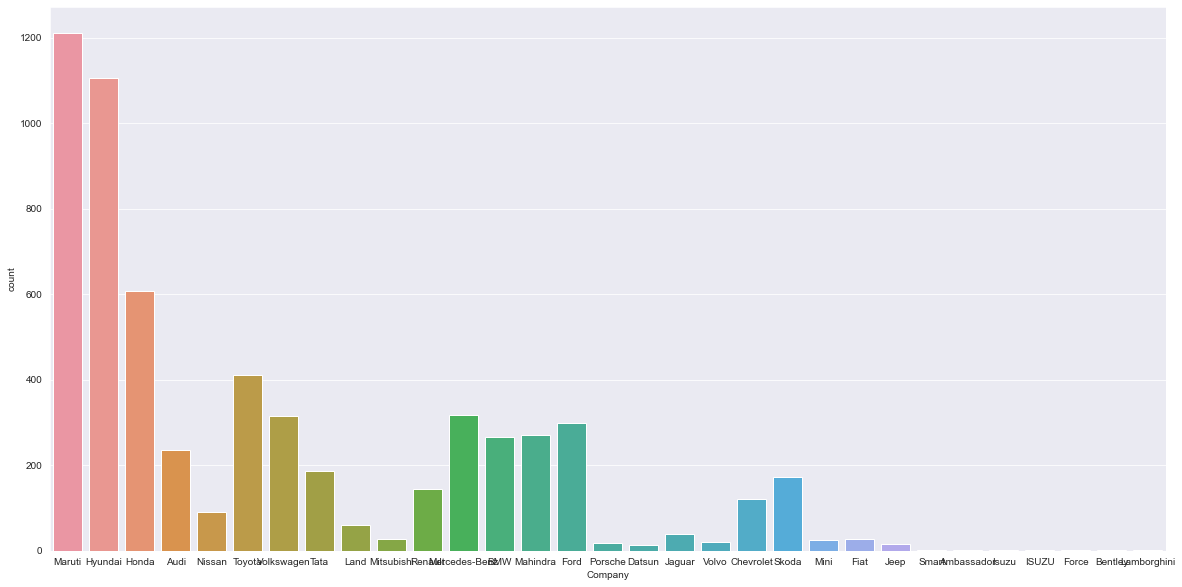

In [71]:
plt.figure(figsize=(20,10))
sns.countplot(data=carDf,x='Company')

<AxesSubplot:xlabel='GroupOfCar', ylabel='count'>

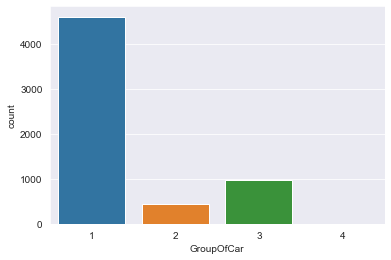

In [72]:
# plt.figure(figsize=(20,10))
sns.countplot(data=carDf,x='GroupOfCar')

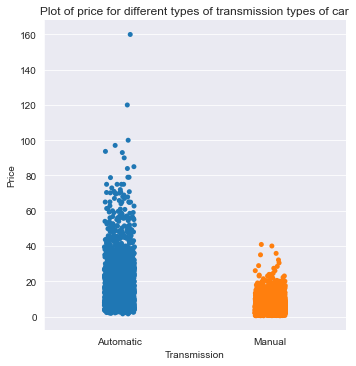

In [73]:
# plt.figure(figsize=(20,10))
sns.catplot(data=carDf,x='Transmission',y='Price').set(title="Plot of price for different types of transmission types of car")
plt.show()

<AxesSubplot:title={'center':'Regression plot with power of engine and price'}, xlabel='Power', ylabel='Price'>

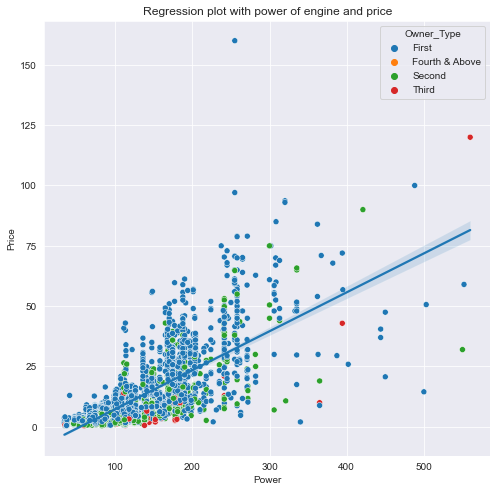

In [74]:
plt.figure(figsize=(8,8))
sns.regplot(data=carDf,x='Power',y='Price',scatter=False).set(title="Regression plot with power of engine and price")
sns.scatterplot(data=carDf, x="Power", y="Price", hue="Owner_Type")

In [75]:
carDf.groupby('Owner_Type').describe()

Year                                                         \
                 count         mean       std     min     25%     50%     75%   
Owner_Type                                                                      
First           4929.0  2013.932441  2.924458  1998.0  2012.0  2014.0  2016.0   
Fourth & Above     9.0  2006.777778  2.635231  2001.0  2006.0  2007.0  2008.0   
Second           968.0  2011.133264  3.306133  1998.0  2009.0  2011.0  2014.0   
Third            113.0  2007.893805  3.518733  1998.0  2006.0  2008.0  2011.0   

                       Kilometers_Driven                 ...  Price         \
                   max             count           mean  ...    75%    max   
Owner_Type                                               ...                 
First           2019.0            4929.0   55366.782106  ...  10.50  160.0   
Fourth & Above  2010.0               9.0  135759.222222  ...   4.00    5.5   
Second          2018.0             968.0   71693.203512  ...   8.25   90.0   
Third           2015.0             113.0   88695.469027  ...   4.20  120.0   

               GroupOfCar                                               
                    count      mean       std  min  25%  50%  75%  max  
Owner_Type                                                              
First              4929.0  1.385474  0.741237  1.0  1.0  1.0  1.0  4.0  
Fourth & Above        9.0  1.333333  0.500000  1.0  1.0  1.0  2.0  2.0  
Second              968.0  1.465909  0.798703  1.0  1.0  1.0  2.0  3.0  
Third               113.0  1.292035  0.677198  1.0  1.0  1.0  1.0  4.0  

[4 rows x 64 columns]

[Text(0.5, 1.0, 'Histogram for frequency of the Owner_type from seller')]

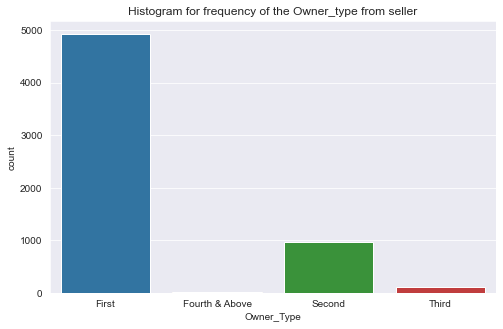

In [76]:
plt.figure(figsize=(8,5))
sns.countplot(data=carDf,x='Owner_Type').set(title="Histogram for frequency of the Owner_type from seller")

In [77]:
carDf.groupby('Location').head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company,GroupOfCar
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.600000,998.0,58.16,5.0,1.75,Maruti,1
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.670000,1582.0,126.20,5.0,12.50,Hyundai,1
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.200000,1199.0,88.70,5.0,4.50,Honda,1
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.770000,1248.0,88.76,7.0,6.00,Maruti,1
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.200000,1968.0,140.80,5.0,17.74,Audi,3
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.100000,814.0,55.20,5.0,2.35,Hyundai,1
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.080000,1461.0,63.10,5.0,3.50,Nissan,1
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.360000,2755.0,171.50,8.0,17.50,Toyota,2
8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.540000,1598.0,103.60,5.0,5.20,Volkswagen,1
9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.300000,1248.0,74.00,5.0,1.95,Tata,1


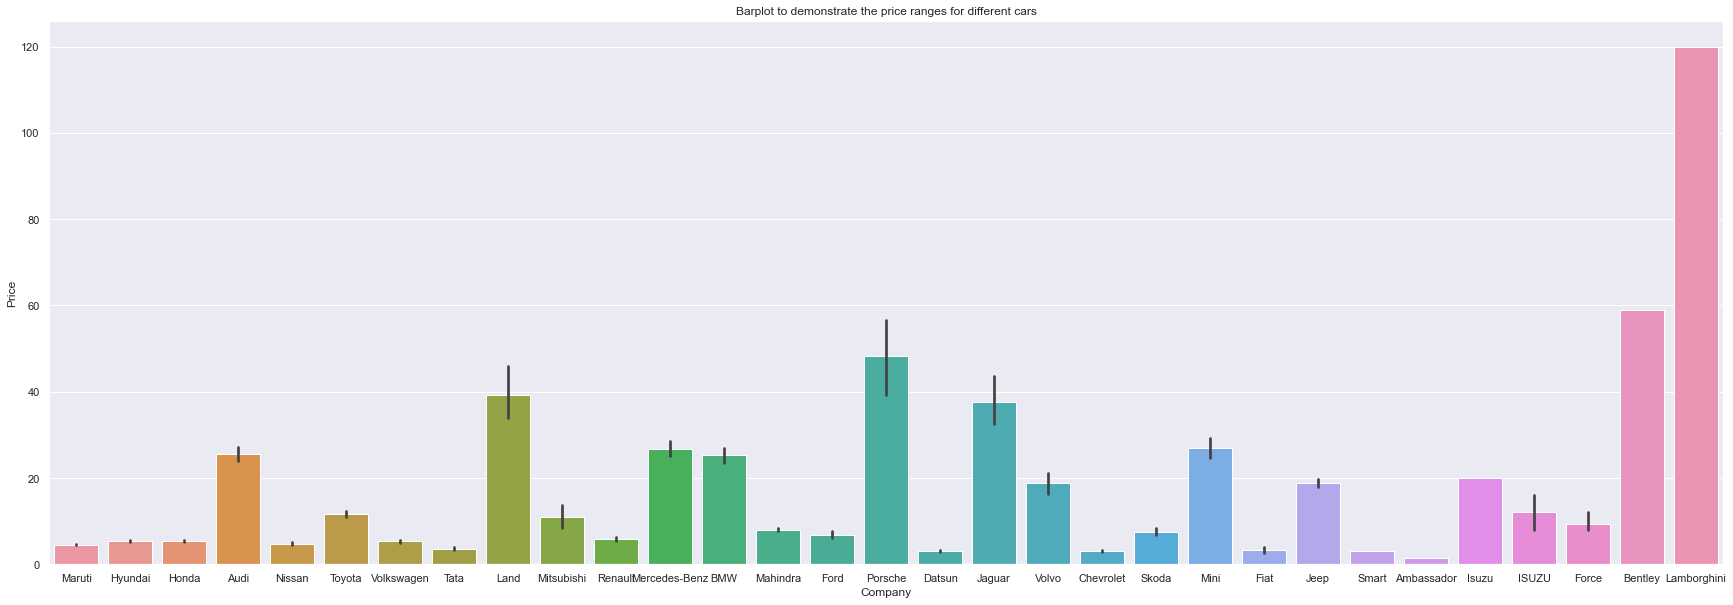

In [78]:
plt.figure(figsize=(30,10))
# sns.histplot(data=carDf,x='Location',y='GroupOfCar')
sns.set()
sns.barplot(data=carDf, x='Company',y='Price' ).set(title="Barplot to demonstrate the price ranges for different cars")
plt.show()

In [79]:
carDf.drop(['Name','Seats','Kilometers_Driven'],axis=1,inplace=True)

In [80]:
carDf.shape

(6019, 11)

In [81]:
carDf.head()

,Location,Year,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Price,Company,GroupOfCar
0,Mumbai,2010,CNG,Manual,First,26.60,998.0,58.16,1.75,Maruti,1
1,Pune,2015,Diesel,Manual,First,19.67,1582.0,126.20,12.50,Hyundai,1
2,Chennai,2011,Petrol,Manual,First,18.20,1199.0,88.70,4.50,Honda,1
3,Chennai,2012,Diesel,Manual,First,20.77,1248.0,88.76,6.00,Maruti,1
4,Coimbatore,2013,Diesel,Automatic,Second,15.20,1968.0,140.80,17.74,Audi,3


In [82]:
carDf.isnull().sum()

Location        0
Year            0
Fuel_Type       0
Transmission    0
Owner_Type      0
Mileage         0
Engine          0
Power           0
Price           0
Company         0
GroupOfCar      0
dtype: int64

In [83]:
carDf.isna().sum()

Location        0
Year            0
Fuel_Type       0
Transmission    0
Owner_Type      0
Mileage         0
Engine          0
Power           0
Price           0
Company         0
GroupOfCar      0
dtype: int64

In [84]:
carDf = pd.get_dummies(carDf,columns=['Location', 'Fuel_Type', 'Transmission','Owner_Type'])

In [85]:
carDf.head()

,Year,Mileage,Engine,Power,Price,Company,GroupOfCar,Location_Ahmedabad,Location_Bangalore,Location_Chennai,...,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2010,26.60,998.0,58.16,1.75,Maruti,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1,2015,19.67,1582.0,126.20,12.50,Hyundai,1,0,0,0,...,1,0,0,0,0,1,1,0,0,0
2,2011,18.20,1199.0,88.70,4.50,Honda,1,0,0,1,...,0,0,0,1,0,1,1,0,0,0
3,2012,20.77,1248.0,88.76,6.00,Maruti,1,0,0,1,...,1,0,0,0,0,1,1,0,0,0
4,2013,15.20,1968.0,140.80,17.74,Audi,3,0,0,0,...,1,0,0,0,1,0,0,0,1,0


In [86]:
carDf.shape

(6019, 29)

In [87]:
carDf.corr().Price

Year                         0.305327
Mileage                     -0.329896
Engine                       0.657118
Power                        0.767386
Price                        1.000000
GroupOfCar                   0.729917
Location_Ahmedabad          -0.017964
Location_Bangalore           0.086526
Location_Chennai            -0.046130
Location_Coimbatore          0.172026
Location_Delhi               0.006496
Location_Hyderabad           0.009958
Location_Jaipur             -0.089049
Location_Kochi               0.052911
Location_Kolkata            -0.106606
Location_Mumbai             -0.001742
Location_Pune               -0.083550
Fuel_Type_CNG               -0.051652
Fuel_Type_Diesel             0.320645
Fuel_Type_Electric           0.005534
Fuel_Type_LPG               -0.025499
Fuel_Type_Petrol            -0.309363
Transmission_Automatic       0.586025
Transmission_Manual         -0.586025
Owner_Type_First             0.091808
Owner_Type_Fourth & Above   -0.021445
Owner_Type_S

<AxesSubplot:>

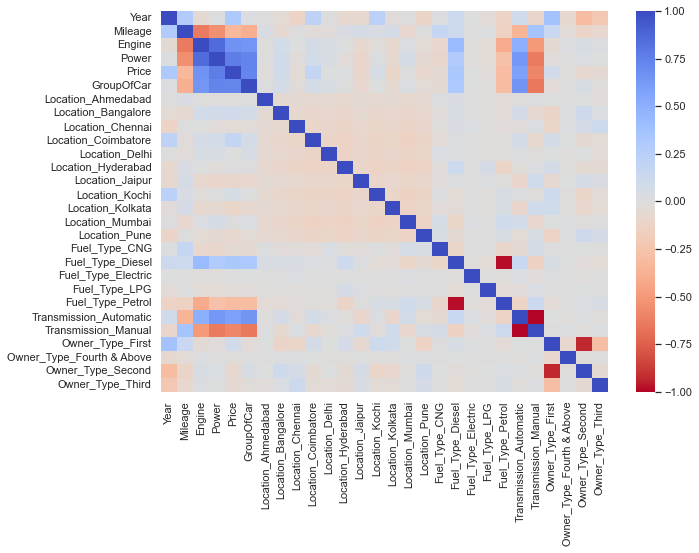

In [88]:

plt.figure(figsize=(10,7))
sns.heatmap(carDf.corr(),cmap='coolwarm_r')

In [89]:
carDf2 = carDf.copy()

In [90]:
carDf = carDf2.copy()

In [91]:
carDf.columns

Index(['Year', 'Mileage', 'Engine', 'Power', 'Price', 'Company', 'GroupOfCar',
       'Location_Ahmedabad', 'Location_Bangalore', 'Location_Chennai',
       'Location_Coimbatore', 'Location_Delhi', 'Location_Hyderabad',
       'Location_Jaipur', 'Location_Kochi', 'Location_Kolkata',
       'Location_Mumbai', 'Location_Pune', 'Fuel_Type_CNG', 'Fuel_Type_Diesel',
       'Fuel_Type_Electric', 'Fuel_Type_LPG', 'Fuel_Type_Petrol',
       'Transmission_Automatic', 'Transmission_Manual', 'Owner_Type_First',
       'Owner_Type_Fourth & Above', 'Owner_Type_Second', 'Owner_Type_Third'],
      dtype='object')

In [92]:
carDf.drop(['Fuel_Type_Electric'],axis=1,inplace=True)

# DataSpliting and defining dependent and independent variables

In [93]:
carDf.columns

Index(['Year', 'Mileage', 'Engine', 'Power', 'Price', 'Company', 'GroupOfCar',
       'Location_Ahmedabad', 'Location_Bangalore', 'Location_Chennai',
       'Location_Coimbatore', 'Location_Delhi', 'Location_Hyderabad',
       'Location_Jaipur', 'Location_Kochi', 'Location_Kolkata',
       'Location_Mumbai', 'Location_Pune', 'Fuel_Type_CNG', 'Fuel_Type_Diesel',
       'Fuel_Type_LPG', 'Fuel_Type_Petrol', 'Transmission_Automatic',
       'Transmission_Manual', 'Owner_Type_First', 'Owner_Type_Fourth & Above',
       'Owner_Type_Second', 'Owner_Type_Third'],
      dtype='object')

In [94]:
independent_Variables = list(carDf.columns)
independent_Variables.remove('Price')
independent_Variables.remove('Company')

independent_Variables

['Year',
 'Mileage',
 'Engine',
 'Power',
 'GroupOfCar',
 'Location_Ahmedabad',
 'Location_Bangalore',
 'Location_Chennai',
 'Location_Coimbatore',
 'Location_Delhi',
 'Location_Hyderabad',
 'Location_Jaipur',
 'Location_Kochi',
 'Location_Kolkata',
 'Location_Mumbai',
 'Location_Pune',
 'Fuel_Type_CNG',
 'Fuel_Type_Diesel',
 'Fuel_Type_LPG',
 'Fuel_Type_Petrol',
 'Transmission_Automatic',
 'Transmission_Manual',
 'Owner_Type_First',
 'Owner_Type_Fourth & Above',
 'Owner_Type_Second',
 'Owner_Type_Third']

In [95]:
X = carDf[independent_Variables]
X

,Year,Mileage,Engine,Power,GroupOfCar,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,...,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2010,26.60,998.0,58.16,1,0,0,0,0,0,...,1,0,0,0,0,1,1,0,0,0
1,2015,19.67,1582.0,126.20,1,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
2,2011,18.20,1199.0,88.70,1,0,0,1,0,0,...,0,0,0,1,0,1,1,0,0,0
3,2012,20.77,1248.0,88.76,1,0,0,1,0,0,...,0,1,0,0,0,1,1,0,0,0
4,2013,15.20,1968.0,140.80,3,0,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,2014,28.40,1248.0,74.00,1,0,0,0,0,1,...,0,1,0,0,0,1,1,0,0,0
6015,2015,24.40,1120.0,71.00,1,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
6016,2012,14.00,2498.0,112.00,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
6017,2013,18.90,998.0,67.10,1,0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,0


In [96]:
X_RFR = carDf[independent_Variables]
X_RFR 

,Year,Mileage,Engine,Power,GroupOfCar,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,...,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2010,26.60,998.0,58.16,1,0,0,0,0,0,...,1,0,0,0,0,1,1,0,0,0
1,2015,19.67,1582.0,126.20,1,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
2,2011,18.20,1199.0,88.70,1,0,0,1,0,0,...,0,0,0,1,0,1,1,0,0,0
3,2012,20.77,1248.0,88.76,1,0,0,1,0,0,...,0,1,0,0,0,1,1,0,0,0
4,2013,15.20,1968.0,140.80,3,0,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,2014,28.40,1248.0,74.00,1,0,0,0,0,1,...,0,1,0,0,0,1,1,0,0,0
6015,2015,24.40,1120.0,71.00,1,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
6016,2012,14.00,2498.0,112.00,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
6017,2013,18.90,998.0,67.10,1,0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,0


In [97]:
y = carDf['Price']
y

0        1.75
1       12.50
2        4.50
3        6.00
4       17.74
        ...  
6014     4.75
6015     4.00
6016     2.90
6017     2.65
6018     2.50
Name: Price, Length: 6019, dtype: float64

In [98]:
y_RFR = carDf['Price']
y_RFR

0        1.75
1       12.50
2        4.50
3        6.00
4       17.74
        ...  
6014     4.75
6015     4.00
6016     2.90
6017     2.65
6018     2.50
Name: Price, Length: 6019, dtype: float64

In [99]:
Xtrain_rf, Xtest_rf, ytrain_rf, ytest_rf = train_test_split(X_RFR, y_RFR, test_size=0.20, random_state=1)
Xtrain_rf.shape,Xtest_rf.shape,ytrain_rf.shape,ytest_rf.shape

((4815, 26), (1204, 26), (4815,), (1204,))

# Linear Regression

In [101]:
from sklearn.linear_model import LinearRegression
linregressor = LinearRegression()
linregressor.fit(Xtrain_rf, ytrain_rf)

LinearRegression()

In [102]:
ypred_lr = linregressor.predict(Xtest_rf)

In [103]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest_rf, ypred_lr))
print('Mean Squared Error:', metrics.mean_squared_error(ytest_rf, ypred_lr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest_rf, ypred_lr)))

Mean Absolute Error: 3.095740692000565
Mean Squared Error: 29.623279565175096
Root Mean Squared Error: 5.442727217597359


In [104]:

r2_score = linregressor.score(Xtest_rf,ytest_rf)
print(r2_score*100,'%')

78.03506757725383 %


In [105]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
num_folds = 10


seed = 7

kfold= KFold(n_splits=num_folds, random_state=seed, shuffle=True)

scoring = 'explained_variance'

results = cross_val_score(linregressor, Xtest_rf, ytest_rf, cv=kfold, scoring=scoring)

print("Average of all results from the K-fold Cross Validation, using exlpained variance:",results.mean())

Average of all results from the K-fold Cross Validation, using exlpained variance: 0.7548641286072684


# Applying Random Forest Regression to the cleaned dataframe

In [106]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(Xtrain_rf, ytrain_rf)

RandomForestRegressor(n_estimators=10, random_state=0)

In [107]:
ypred_rf = regressor.predict(Xtest_rf)

In [108]:

ypred_rf

array([66.102 ,  2.682 ,  7.9785, ...,  7.86  ,  7.403 , 17.872 ])

In [109]:
r2_score = regressor.score(Xtest_rf,ytest_rf)
print(r2_score*100,'%')

91.595469425697 %


In [110]:
r2_score = regressor.score(Xtrain_rf,ytrain_rf)
print(r2_score*100,'%')

97.84014571993809 %


In [111]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest_rf, ypred_rf))
print('Mean Squared Error:', metrics.mean_squared_error(ytest_rf, ypred_rf))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest_rf, ypred_rf)))

Mean Absolute Error: 1.5347331931979982
Mean Squared Error: 11.334874791547925
Root Mean Squared Error: 3.366730578996176


In [122]:
pip install scikit-optimize

     ------------------------------------ 100.3/100.3 KB 360.1 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\jesud\anaconda3\python.exe -m pip install --upgrade pip' command.


In [123]:
from skopt import BayesSearchCV

In [125]:
rfr = RandomForestRegressor()

search_space_rfr = {
    'n_estimators':list(range(10,200)),
    'max_depth':list(range(10,100)),
    'min_samples_split':list(range(2,10)),
    'min_samples_leaf':list(range(1,10))
}

opt = BayesSearchCV(rfr,search_spaces=search_space_rfr,n_iter=40,n_points=8,cv=5,n_jobs=-1,verbose=True,scoring='neg_mean_squared_error')

In [126]:
opt.fit(Xtrain_rf,ytrain_rf)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits


BayesSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=40, n_jobs=-1,
              n_points=8, scoring='neg_mean_squared_error',
              search_spaces={'max_depth': [10, 11, 12, 13, 14, 15, 16, 17, 18,
                                           19, 20, 21, 22, 23, 24, 25, 26, 27,
                                           28, 29, 30, 31, 32, 33, 34, 35, 36,
                                           37, 38, 39, ...],
                             'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                             'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9],
                             'n_estimators': [10, 11, 12, 13, 14, 15, 16, 17,
                                              18, 19, 20, 21, 22, 23, 24, 25,
                                              26, 27, 28, 29, 30, 31, 32, 33,
                                              34, 35, 36, 37, 38, 39, ...]},
              verbose=True)

In [127]:
r2_score = regressor.score(Xtest_rf,ytest_rf)
print(r2_score*100,'%')

91.595469425697 %


In [128]:
r2_score = opt.score(Xtest_rf,ytest_rf)
print(r2_score*10,'%')

-88.83307705154607 %


In [129]:
opt.best_params_

OrderedDict([('max_depth', 44),
             ('min_samples_leaf', 2),
             ('min_samples_split', 2),
             ('n_estimators', 134)])

In [130]:
opt.best_score_

-14.953756649312533

In [131]:
opt.best_estimator_

RandomForestRegressor(max_depth=44, min_samples_leaf=2, n_estimators=134)

In [132]:
opt.best_index_

38

In [133]:
ytrainpredict_rf = opt.predict(Xtrain_rf)
ytestpredict_rf = opt.predict(Xtest_rf)

ytrainpredict_rf = np.expand_dims(ytrainpredict_rf,axis=1)
ytestpredict_rf = np.expand_dims(ytestpredict_rf,axis=1)

In [150]:
def calculateR2(actual,predict):
    corr_matrix = np.corrcoef(actual, predict)
    corr = corr_matrix[0,1]
    R_sq = corr**2
    return R_sq*100

In [140]:
print(f'MAE train: {metrics.mean_absolute_error(ytrain_rf, ytrainpredict_rf)}, test: {metrics.mean_absolute_error(ytest_rf, ytestpredict_rf)}')
print(f'RMSE train:{metrics.mean_squared_error(ytrain_rf, ytrainpredict_rf,squared=False)}, test: {metrics.mean_squared_error(ytest_rf, ytestpredict_rf,squared=False)}')

print(f'MSE train: {(mean_squared_error(ytrain_rf, ytrainpredict_rf))}, test: {(mean_squared_error(ytest_rf, ytestpredict_rf))}')

MAE train: 0.8298146893599676, test: 1.4403219086982852
RMSE train:2.195927990192694, test: 2.9804878300631605
MSE train: 4.822099738111723, test: 8.883307705154607


In [141]:
dict(zip(independent_Variables,opt.best_estimator_.feature_importances_))

{'Year': 0.18852331452400226,
 'Mileage': 0.034234777564742955,
 'Engine': 0.03754749573947722,
 'Power': 0.18680629813687427,
 'GroupOfCar': 0.5211086539456198,
 'Location_Ahmedabad': 0.00015644163150553138,
 'Location_Bangalore': 0.001725622085898236,
 'Location_Chennai': 0.0009611670210324226,
 'Location_Coimbatore': 0.0025530758018256134,
 'Location_Delhi': 0.0012825071422580558,
 'Location_Hyderabad': 0.010826270702916295,
 'Location_Jaipur': 0.0002925467354752024,
 'Location_Kochi': 0.003109084706283717,
 'Location_Kolkata': 0.0009843623213782095,
 'Location_Mumbai': 0.0021191751542518904,
 'Location_Pune': 0.0005335934215362107,
 'Fuel_Type_CNG': 3.5105974807058055e-06,
 'Fuel_Type_Diesel': 0.0010062192635070211,
 'Fuel_Type_LPG': 1.658730285620279e-07,
 'Fuel_Type_Petrol': 0.0011778458360362284,
 'Transmission_Automatic': 0.0005930454737288388,
 'Transmission_Manual': 0.0005591725722934348,
 'Owner_Type_First': 0.0026547940318485713,
 'Owner_Type_Fourth & Above': 1.854490698126

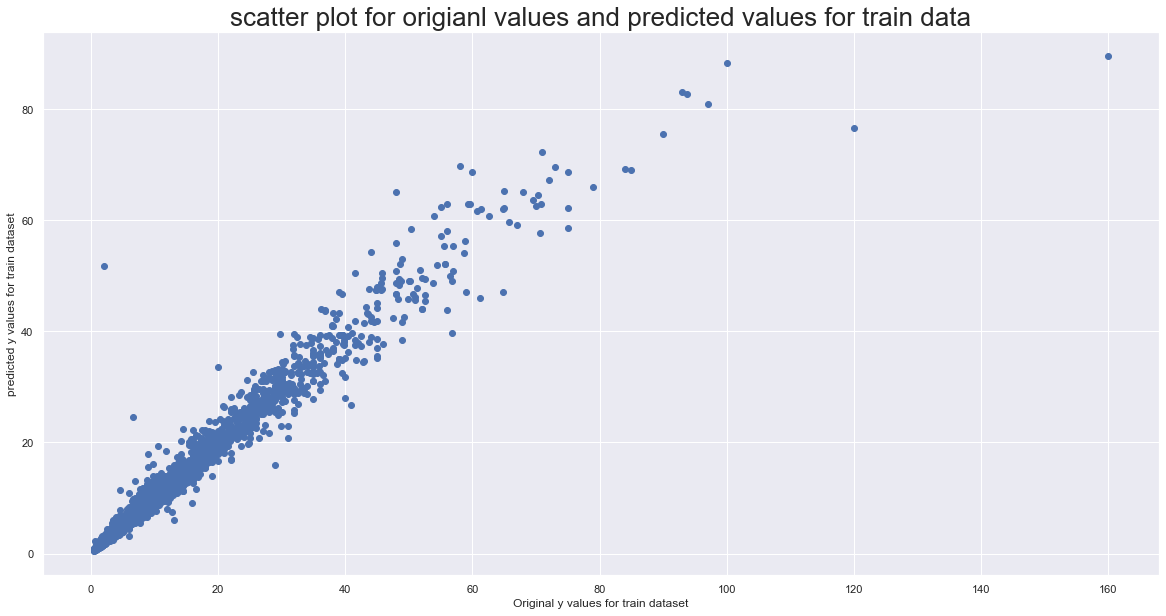

In [142]:
plt.figure(figsize=(20,10))
plt.scatter(ytrain_rf,ytrainpredict_rf)
plt.xlabel('Original y values for train dataset')
plt.title("scatter plot for origianl values and predicted values for train data",fontdict={'fontsize': 26})
plt.ylabel('predicted y values for train dataset')
# plt.plot(ytest_rf,regressor.predict(Xtest_rf))
plt.show()

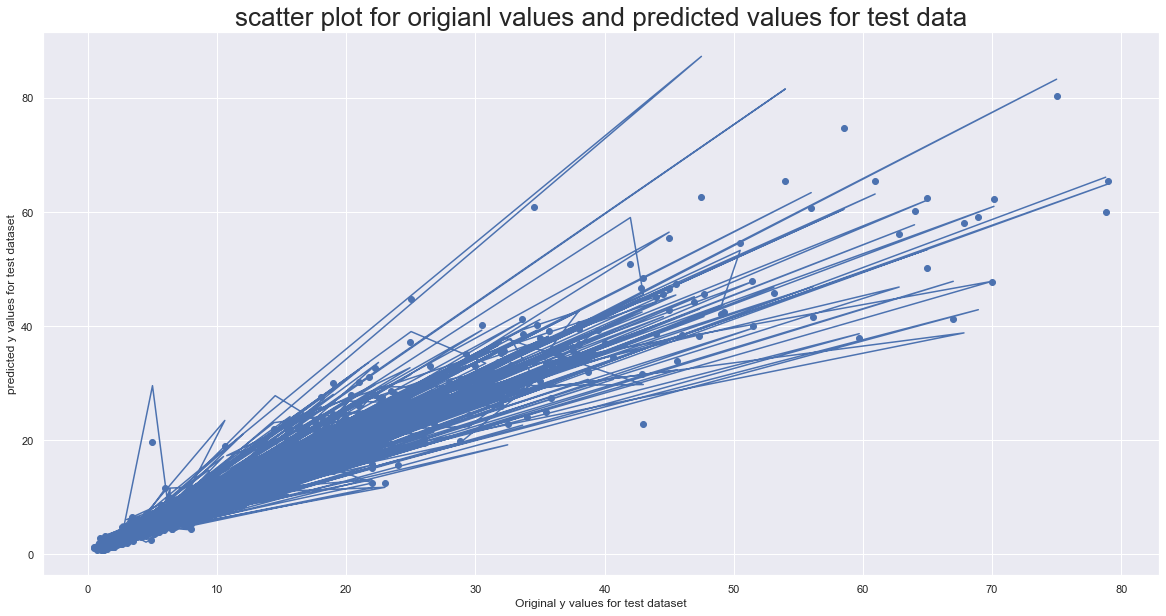

In [143]:
plt.figure(figsize=(20,10))
plt.scatter(ytest_rf,ytestpredict_rf)
plt.title("scatter plot for origianl values and predicted values for test data",fontdict={'fontsize': 26})
plt.xlabel('Original y values for test dataset')
plt.ylabel('predicted y values for test dataset')
plt.plot(ytest_rf,regressor.predict(Xtest_rf))
plt.show()

In [155]:
ytestpredict_rf_list = opt.predict(Xtrain_rf)

In [156]:
def calculateR2(actual,predict):
    corr_matrix = np.corrcoef(actual, predict)
    corr = corr_matrix[0,1]
    R_sq = corr**2
    return R_sq*100

In [159]:
print(f'MAE train: {metrics.mean_absolute_error(ytrain_rf, ytrainpredict_rf)}, test: {metrics.mean_absolute_error(ytest_rf, ytestpredict_rf)}')
print(f'RMSE train: {metrics.mean_squared_error(ytrain_rf, ytrainpredict_rf,squared=False)}, test: {metrics.mean_squared_error(ytest_rf, ytestpredict_rf,squared=False)}')
print(f'MSE train: {(mean_squared_error(ytrain_rf, ytrainpredict_rf))}, test: {(mean_squared_error(ytest_rf, ytestpredict_rf))}')

MAE train: 0.8298146893599676, test: 1.4403219086982852
RMSE train: 2.195927990192694, test: 2.9804878300631605
MSE train: 4.822099738111723, test: 8.883307705154607


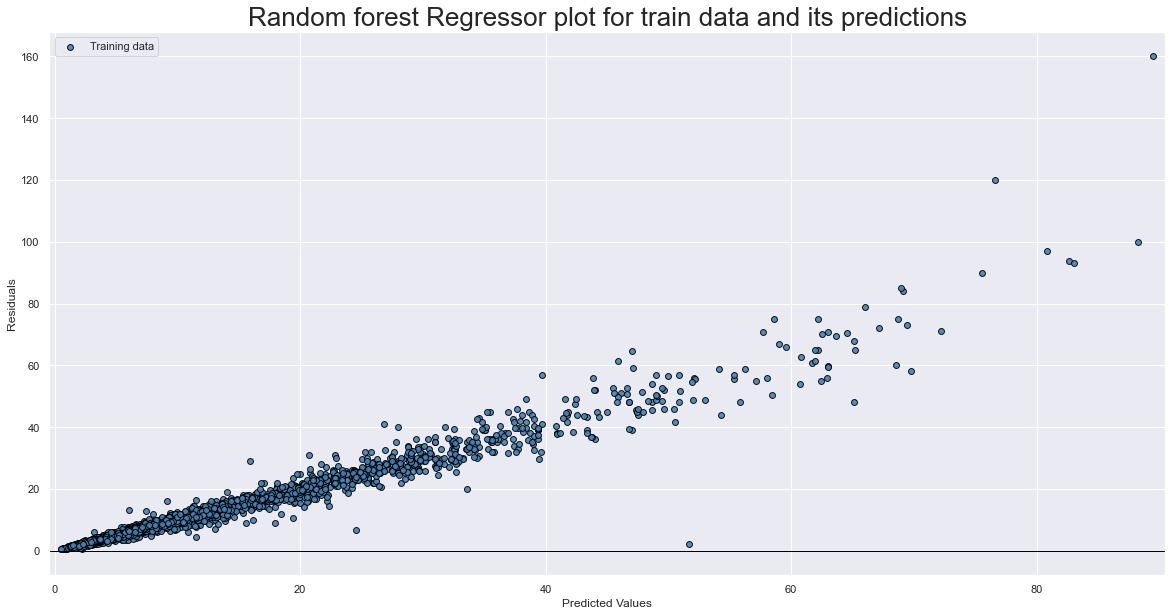

In [161]:
plt.figure(figsize=(20,10))
plt.scatter(ytrainpredict_rf, ytrain_rf, c='steelblue', marker='o', edgecolors='black', s=35, alpha=0.9, label="Training data")
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Random forest Regressor plot for train data and its predictions',fontdict={'fontsize': 26})
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=ytrainpredict_rf.min()-2, xmax=ytrainpredict_rf.max()+5, lw=1, color='black')
plt.xlim([ytrainpredict_rf.min()-1, ytrainpredict_rf.max()+1])
plt.show()

In [162]:
ytestpredict_rf_list = []
for row in ytestpredict_rf.tolist():
    ytestpredict_rf_list += row

In [163]:
ytestpredict_rf_list

[60.018371446339735,
 2.397206378820186,
 8.264455046197586,
 9.579513266998338,
 3.083863052163424,
 3.646504530916846,
 22.02773471926085,
 7.847716506751954,
 3.7358681295901444,
 5.029906242596539,
 10.474178038379534,
 2.278461442786071,
 8.819749874503604,
 12.885683724235951,
 5.078382551528074,
 62.71551729447997,
 3.672929904051172,
 7.491714759535658,
 2.8761316631130054,
 5.623849680170575,
 13.575730961617158,
 3.6789678393745557,
 11.473125681118217,
 5.484195066334993,
 2.68250716654821,
 2.5461503745011225,
 17.860727848850974,
 2.1999187100213202,
 3.2170872491935927,
 3.9569936707156854,
 12.545956734186207,
 11.011028073916131,
 1.0762601279317698,
 2.217142324093816,
 5.257734808102346,
 12.317725568585642,
 6.464835376687986,
 2.239473258706466,
 5.02877312032909,
 41.32153891257996,
 6.041176143094053,
 5.975195184790335,
 32.57845270670458,
 15.396917940061593,
 10.63344080194267,
 5.840362384506039,
 12.61785498104715,
 8.486119225302064,
 3.1175589961448176,
 2.

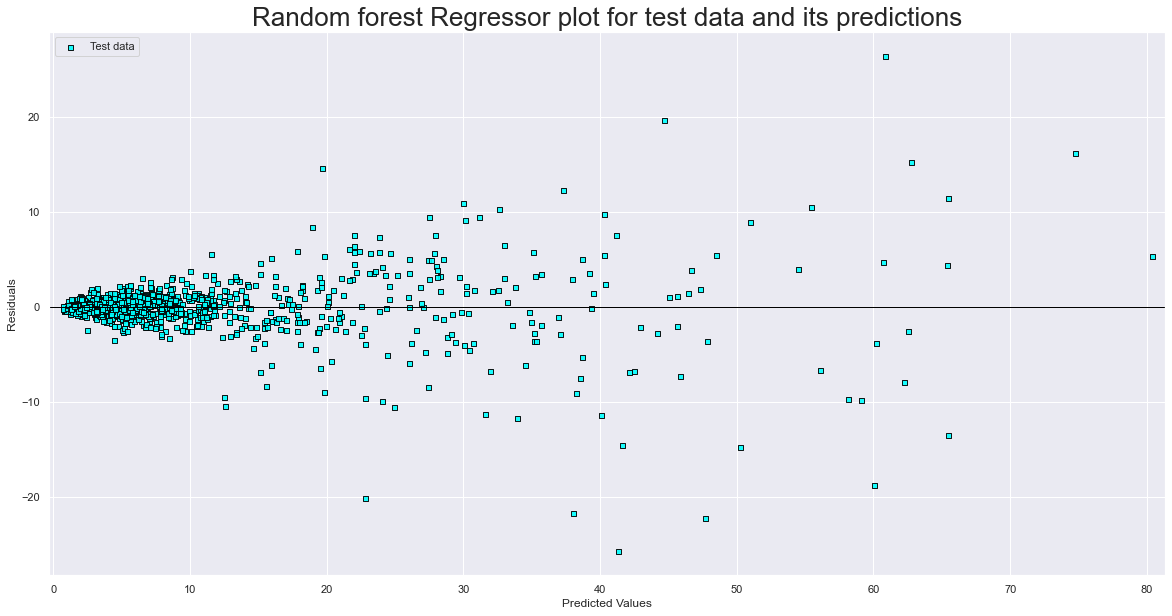

In [164]:
plt.figure(figsize=(20,10))
plt.scatter(ytestpredict_rf, ytestpredict_rf_list-ytest_rf, c='cyan', marker='s', edgecolors='black', s=25, alpha=0.9, label="Test data")
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.title('Random forest Regressor plot for test data and its predictions',fontdict={'fontsize': 26})
plt.hlines(y=0, xmin=ytestpredict_rf.min()-1, xmax=ytestpredict_rf.max()+1, lw=1, color='black')
plt.xlim([ytestpredict_rf.min()-1, ytestpredict_rf.max()+1])
plt.show()

In [165]:
np.mean(ytrain_rf.values),np.max(ytrain_rf.values),np.std(ytrain_rf.values)

(9.32064797507788, 160.0, 11.072158894793326)

In [166]:
np.mean(ytest_rf.values),np.max(ytest_rf.values), np.std(ytest_rf.values)

(10.114617940199336, 79.0, 11.613192711468198)

In [167]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
num_folds = 10


seed = 7

kfold= KFold(n_splits=num_folds, random_state=seed, shuffle=True)

scoring = 'explained_variance'

results = cross_val_score(opt, Xtest_rf, ytest_rf, cv=kfold, scoring=scoring)

print("Average of all results from the K-fold Cross Validation, using exlpained variance:",results.mean())

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates

C:\Users\jesud\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates

# KNN model creation

In [168]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_kk = carDf.loc[:,carDf.columns!='Price']
y_kk = carDf['Price'].values
X_kk = X_kk.loc[:,X_kk.columns!='Company'].values
Xtrain_kk, Xtest_kk, ytrain_kk, ytest_kk = train_test_split(X_kk, y_kk, test_size=0.25, random_state=1)
Xtrain_kk = scaler.fit_transform(Xtrain_kk)
Xtest_kk = scaler.transform(Xtest_kk)

In [169]:
regressor_kk = KNeighborsRegressor(n_neighbors=3)
regressor_kk.fit(Xtrain_kk,ytrain_kk)

KNeighborsRegressor(n_neighbors=3)

In [170]:
r2_score = regressor_kk.score(Xtest_kk,ytest_kk)
print(r2_score,'%')

0.8281919332476 %


In [171]:
from skopt import BayesSearchCV

knn = KNeighborsRegressor()

search_space_knn = {
    'n_neighbors':list(range(2,20)),
    'weights':['uniform','distance']
}

optkk = BayesSearchCV(knn,search_spaces=search_space_knn,n_iter=40,n_points=8,cv=5,n_jobs=-1,verbose=True,scoring='neg_mean_squared_error')

In [172]:
optkk.fit(Xtrain_kk,ytrain_kk)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits


C:\Users\jesud\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\jesud\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\jesud\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\jesud\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\jesud\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 8 candidates, totalling 40 fits


C:\Users\jesud\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\jesud\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\jesud\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\jesud\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\jesud\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\jesud\

Fitting 5 folds for each of 8 candidates, totalling 40 fits


BayesSearchCV(cv=5, estimator=KNeighborsRegressor(), n_iter=40, n_jobs=-1,
              n_points=8, scoring='neg_mean_squared_error',
              search_spaces={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                             13, 14, 15, 16, 17, 18, 19],
                             'weights': ['uniform', 'distance']},
              verbose=True)

In [173]:
optkk.best_params_

OrderedDict([('n_neighbors', 6), ('weights', 'distance')])

In [174]:
optkk.best_estimator_

KNeighborsRegressor(n_neighbors=6, weights='distance')

In [175]:
optkk.best_score_

-26.99786137449849

In [176]:
optkk.best_index_

12

In [177]:
ytrainpredict_kk = optkk.predict(Xtrain_kk)
ytestpredict_kk = optkk.predict(Xtest_kk)

In [178]:
def calculateR2(actual,predict):
    corr_matrix = np.corrcoef(actual, predict)
    corr = corr_matrix[0,1]
    R_sq = corr**2
    return R_sq*100

In [179]:
print(f'MAE train: {metrics.mean_absolute_error(ytrain_kk, ytrainpredict_kk)}, test: {metrics.mean_absolute_error(ytest_kk, ytestpredict_kk)}')
print(f'RMSE train: {metrics.mean_squared_error(ytrain_kk, ytrainpredict_kk,squared=False)}, test: {metrics.mean_squared_error(ytest_kk, ytestpredict_kk,squared=False)}')
print(f'R^2 train: {(calculateR2(ytrain_kk, ytrainpredict_kk))}, test: {(calculateR2(ytest_kk, ytestpredict_kk))}')
print(f'MSE train: {(mean_squared_error(ytrain_kk, ytrainpredict_kk))}, test: {(mean_squared_error(ytest_kk, ytestpredict_kk))}')

MAE train: 0.09497436823830735, test: 2.006516525266944
RMSE train: 0.37021478527623225, test: 4.153256629386296
R^2 train: 99.89164908535659, test: 85.7706020426161
MSE train: 0.13705898723712676, test: 17.24954062954121


In [180]:
print(f'R^2 train: {(calculateR2(ytrain_kk, ytrainpredict_kk))}, test: {(calculateR2(ytest_kk, ytestpredict_kk))}')

R^2 train: 99.89164908535659, test: 85.7706020426161


In [181]:
type(ytrainpredict_kk.tolist())

list

In [182]:
list(ytest_kk)

[78.8,
 3.51,
 6.0,
 10.28,
 2.35,
 3.35,
 16.25,
 8.4,
 4.0,
 4.5,
 12.5,
 1.79,
 8.1,
 13.35,
 4.65,
 47.5,
 3.0,
 9.11,
 2.5,
 5.99,
 10.9,
 3.1,
 12.5,
 4.5,
 2.4,
 1.89,
 19.5,
 2.9,
 3.57,
 4.5,
 23.0,
 10.0,
 1.3,
 2.25,
 4.38,
 15.5,
 6.35,
 2.15,
 4.25,
 67.0,
 6.5,
 5.1,
 22.25,
 17.0,
 9.2,
 5.75,
 10.97,
 11.82,
 2.78,
 2.35,
 2.6,
 30.35,
 6.34,
 29.8,
 1.3,
 6.0,
 7.75,
 6.5,
 2.65,
 5.5,
 65.0,
 5.42,
 4.0,
 6.43,
 6.75,
 7.48,
 47.7,
 8.73,
 4.25,
 6.22,
 9.95,
 17.5,
 2.5,
 4.0,
 3.49,
 11.75,
 2.75,
 3.6,
 2.5,
 3.85,
 22.55,
 4.45,
 1.5,
 5.8,
 6.69,
 10.75,
 3.4,
 9.0,
 3.0,
 19.86,
 4.45,
 3.0,
 22.0,
 20.04,
 7.75,
 17.56,
 6.2,
 7.75,
 23.91,
 37.92,
 2.0,
 22.0,
 35.28,
 38.0,
 33.66,
 5.35,
 5.5,
 4.5,
 4.1,
 24.95,
 33.13,
 3.89,
 45.61,
 18.9,
 5.5,
 6.25,
 2.0,
 4.0,
 2.1,
 7.9,
 3.6,
 23.75,
 2.35,
 2.0,
 6.17,
 3.75,
 2.59,
 2.8,
 8.38,
 4.75,
 6.16,
 3.94,
 53.11,
 6.0,
 16.09,
 9.25,
 3.7,
 9.4,
 2.0,
 17.0,
 2.44,
 45.0,
 16.56,
 2.55,
 9.9,
 12.5,
 45.

In [183]:
list(ytestpredict_kk)

[48.92968736738438,
 3.8289173309827182,
 5.471120845624647,
 9.282199166683501,
 2.6512110424723434,
 3.2795235190588072,
 25.23691587359157,
 8.5,
 3.3250203864381405,
 5.466429631231457,
 8.767845046595182,
 2.692814190115111,
 4.676738665703596,
 13.175,
 5.236083968043799,
 62.79072251374263,
 3.303527490255023,
 12.750341285517987,
 3.07496852271246,
 6.774826979496613,
 11.076312045307585,
 3.2154779718016515,
 12.6,
 5.713937202525013,
 1.770491439632351,
 2.5,
 16.45,
 4.280772759109751,
 4.638891292976528,
 4.05,
 22.69978092458929,
 12.610192384060397,
 1.9739138341514084,
 2.3021449619187595,
 6.252299310398973,
 18.541635359194732,
 7.25,
 2.271290136760362,
 4.825,
 37.64642808522759,
 5.8306463299751075,
 5.837823474975073,
 34.31196136175678,
 9.780343799761713,
 8.398482561605817,
 6.1,
 11.239426383540435,
 9.692384877441983,
 4.154913554395393,
 2.226343000497452,
 3.104237783644332,
 29.04,
 7.656370122158472,
 14.268279319031725,
 2.668449074783678,
 5.080596652332

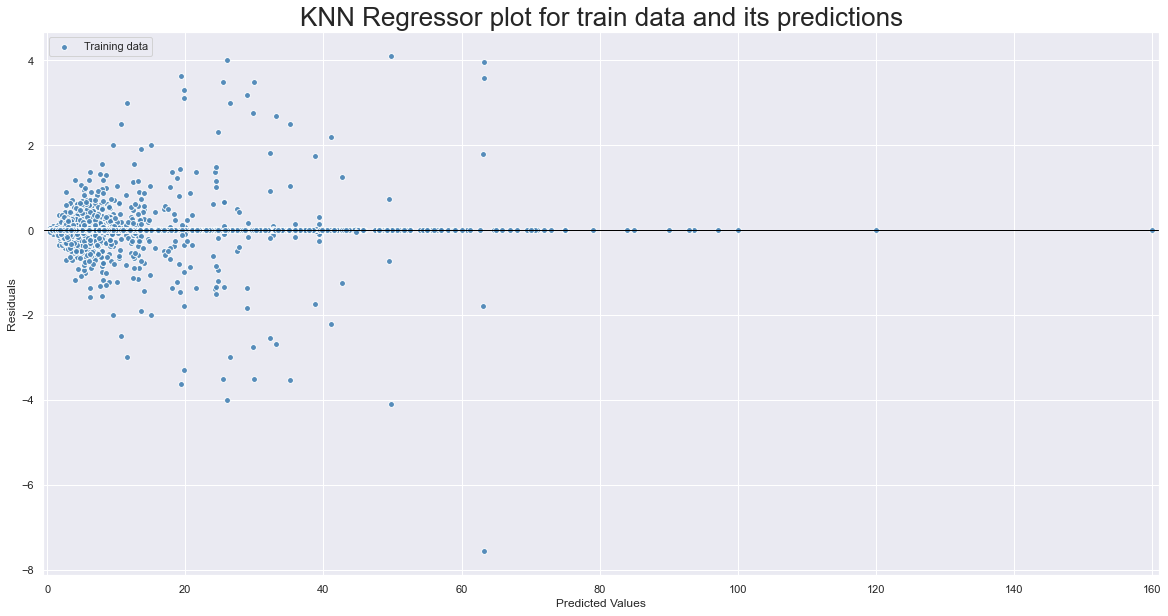

In [184]:
plt.figure(figsize=(20,10))
plt.scatter(ytrainpredict_kk, ytrainpredict_kk-ytrain_kk, c='steelblue', marker='o', edgecolors='white', s=35, alpha=0.9, label="Training data")
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.title('KNN Regressor plot for train data and its predictions',fontdict={'fontsize': 26})
plt.hlines(y=0, xmin=ytrainpredict_kk.min()-2, xmax=ytrainpredict_kk.max()+5, lw=1, color='black')
plt.xlim([ytrainpredict_kk.min()-1, ytrainpredict_kk.max()+1])
plt.show()

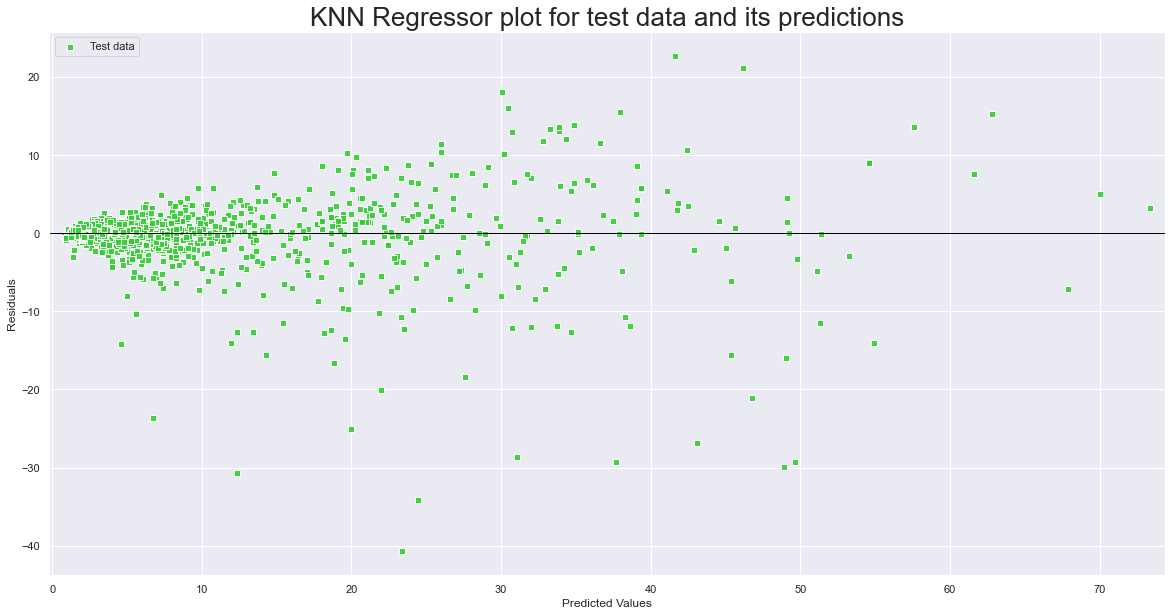

In [185]:
plt.figure(figsize=(20,10))
plt.scatter(ytestpredict_kk, ytestpredict_kk-ytest_kk, c='limegreen', marker='s', edgecolors='white', s=35, alpha=0.9, label="Test data")
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('KNN Regressor plot for test data and its predictions',fontdict={'fontsize': 26})
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=ytestpredict_kk.min()-1, xmax=ytestpredict_kk.max()+1, lw=1, color='black')
plt.xlim([ytestpredict_kk.min()-1, ytestpredict_kk.max()+1])
plt.show()

In [187]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
num_folds = 10
seed = 7
kfold= KFold(n_splits=num_folds, random_state=seed, shuffle=True)

scoring = 'explained_variance'

results = cross_val_score(optkk, Xtest_kk, ytest_kk, cv=kfold, scoring=scoring)

print("Average of all results from the K-fold Cross Validation, using exlpained variance:",results.mean())

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits


C:\Users\jesud\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\jesud\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\jesud\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 8 candidates, totalling 40 fits


C:\Users\jesud\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\jesud\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\jesud\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\jesud\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\jesud\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\jesud\

Fitting 5 folds for each of 8 candidates, totalling 40 fits


C:\Users\jesud\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\jesud\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\jesud\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\jesud\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\jesud\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\jesud\

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits


C:\Users\jesud\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\jesud\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\jesud\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\jesud\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\jesud\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\jesud\

Fitting 5 folds for each of 8 candidates, totalling 40 fits


C:\Users\jesud\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\jesud\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\jesud\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\jesud\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\jesud\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\jesud\

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits


C:\Users\jesud\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits


C:\Users\jesud\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\jesud\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\jesud\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\jesud\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\jesud\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\jesud\

Fitting 5 folds for each of 8 candidates, totalling 40 fits


C:\Users\jesud\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\jesud\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\jesud\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\jesud\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\jesud\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\jesud\

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits


C:\Users\jesud\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\jesud\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\jesud\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\jesud\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\jesud\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\jesud\

Fitting 5 folds for each of 8 candidates, totalling 40 fits


C:\Users\jesud\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\jesud\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\jesud\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\jesud\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\jesud\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\jesud\

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits


C:\Users\jesud\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\jesud\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\jesud\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\jesud\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\jesud\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\jesud\

Fitting 5 folds for each of 8 candidates, totalling 40 fits


C:\Users\jesud\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\jesud\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\jesud\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\jesud\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\jesud\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\jesud\

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits


C:\Users\jesud\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\jesud\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 8 candidates, totalling 40 fits


C:\Users\jesud\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\jesud\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\jesud\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\jesud\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\jesud\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 8 candidates, totalling 40 fits


C:\Users\jesud\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\jesud\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits


C:\Users\jesud\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\jesud\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\jesud\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\jesud\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\jesud\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\jesud\

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits


C:\Users\jesud\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\jesud\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\jesud\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\jesud\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\jesud\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\jesud\

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits


C:\Users\jesud\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\jesud\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\jesud\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\jesud\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\jesud\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits


C:\Users\jesud\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\jesud\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 8 candidates, totalling 40 fits


C:\Users\jesud\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\jesud\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\jesud\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\jesud\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\jesud\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\jesud\

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits


C:\Users\jesud\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\jesud\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\jesud\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\jesud\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\jesud\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\jesud\

Fitting 5 folds for each of 8 candidates, totalling 40 fits


C:\Users\jesud\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\jesud\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\jesud\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\jesud\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\jesud\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\jesud\

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits


C:\Users\jesud\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\jesud\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\jesud\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\jesud\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\jesud\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\jesud\

Fitting 5 folds for each of 8 candidates, totalling 40 fits


C:\Users\jesud\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\jesud\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\jesud\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\jesud\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\jesud\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\jesud\

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Average of all results from the K-fold Cross Validation, using exlpained variance: 0.7586329008171689
